<a href="https://colab.research.google.com/github/SimonParadise/MPA-MLF-Buchta-228812/blob/main/lab3Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60, 2)
[[ 3.00786776  1.8599373 ]
 [15.75831528 15.98074375]
 [ 2.53970335  5.26471704]]


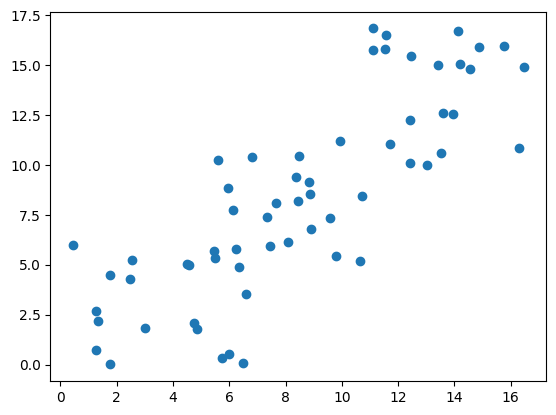

In [3]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

loaded_points = np.load('sample_data/data/k_mean_points.npy')

plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])
print(loaded_points.shape)

k = 3

def initialize_clusters(points: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Initializes and returns k random centroids from the given dataset.

    :param points: Array of data points.
    :type: points ndarray with shape (n, 2)

    :param k_clusters: The number of clusters to form
    :type k_clusters: int


    :return: initial_clusters
    initial_clusters: Array of initialized centroids

    :rtype:
    initial_clusters: np.array (k_clusters, 2)
    :

    """

    ###################################
    # Write your own code here #
    random_indices = np.random.choice(points.shape[0], size=k_clusters, replace=False)

    initial_clusters = points[random_indices]



    ###################################

    return initial_clusters

initial_clusters = initialize_clusters(loaded_points, k)
print(initial_clusters)

In [4]:
def calculate_metric(points: np.ndarray, centroid: np.ndarray) -> np.ndarray:
    """
    Calculates the distance metric between each point and a given centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroid: A single centroid
    :type centroid: ndarray with shape (1, 2)

    :return: distances_array
    distances_array: Array of distances from point to centroid

    :rtype:
    distances_array: ndarray with shape (n,)
    :
    """

    ###################################
    # Write your own code here #
    distances_array = np.linalg.norm(points - centroid, axis=1)


    ###################################

    return distances_array


metrics = calculate_metric(loaded_points, initial_clusters[0])
print(metrics)

[ 1.8446794   3.95430449  4.5569066   4.27173183  4.50590483  4.85594092
  1.7489107   3.50707359  3.43681582  2.07320624  2.2260678   3.11545123
  0.          3.90730009  1.92257526  1.69827885  2.51086459  2.91359409
  3.26743142  3.49784037  9.25133042  7.02011215  9.35039337  8.79538025
  8.57758207  9.34715438  6.66821237 10.14494363  7.78263471  8.33872909
  8.32378362 11.63247196  7.66342859  5.09337414  6.00948113  7.67827127
  7.59548181 10.1996878   8.88412875  6.65109566 16.98477517 18.74810844
 16.55352947 16.76279061 15.06831274 18.56513516 15.29294583 14.0312504
 13.66049709 12.50936596 12.93343353 17.29681823 17.34290445 16.07456988
 16.05023583 16.37862038 18.3919078  19.02553775 17.0361406  12.65625506]


In [5]:
def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:
    """
    Computes and returns the distance from each point to each centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroids_points: A all centroid points
    :type centroids_points: ndarray with shape (k_clusters, 2)


    :return: distances_array
    distances_array: 2D array with distances of each point to each centroid.

    :rtype:
    distances_array: ndarray of shape (k_clusters, n)
    """
    ###################################
    # Write your own code here #



    # Initialize an empty list to store distances for each centroid
    distances_list = []

    # Loop through each centroid and calculate distances from all points to the centroid
    for centroid in centroids_points:
        distances_to_centroid = calculate_metric(points, centroid)

        # Append the distances of all points to the current centroid into the distances_list
        distances_list.append(distances_to_centroid)

    # Stack the list of distances into a 2D array (n, k_clusters)
    distances_array = np.array(distances_list).T  # Transpose to get shape (n, k_clusters)

    ###################################

    return distances_array

distances = compute_distances(loaded_points,initial_clusters)
print(distances)

[[ 1.8446794  17.89879969  4.17403823]
 [ 3.95430449 15.44699816  4.38639828]
 [ 4.5569066  14.55037317  2.95491256]
 [ 4.27173183 14.79074279  2.94595332]
 [ 4.50590483 14.54846742  3.82187345]
 [ 4.85594092 18.27702895  2.20847182]
 [ 1.7489107  17.71908661  3.85065329]
 [ 3.50707359 15.70210277  1.97645187]
 [ 3.43681582 17.01660747  0.        ]
 [ 2.07320624 21.03817677  4.71588642]
 [ 2.2260678  21.2305503   5.31164275]
 [ 3.11545123 18.57101805  5.86169465]
 [ 0.         19.02553775  3.43681582]
 [ 3.90730009 18.3769033   6.50289423]
 [ 1.92257526 19.65193517  2.86230722]
 [ 1.69827885 19.95203225  3.30181555]
 [ 2.51086459 17.69020271  0.95677199]
 [ 2.91359409 18.10103066  1.0897052 ]
 [ 3.26743142 18.24749574  5.84429292]
 [ 3.49784037 15.68934385  2.03309145]
 [ 9.25133042  9.89157106  7.15219888]
 [ 7.02011215 12.03038069  5.25508852]
 [ 9.35039337 10.54396479  6.68100562]
 [ 8.79538025 11.64995724  5.86437922]
 [ 8.57758207 10.59872065  7.35260252]
 [ 9.34715438  9.7135201 

In [6]:
def assign_centroids(distances: np.ndarray) -> np.ndarray:
    """
    Assigns each point to the closest centroid based on the distances.

    Parameters:
    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n)

    :return: assigned_clusters
    assigned_clusters: Array indicating the closest centroid for each data point.

    :rtype:
    assigned_centroids: ndarray with shape (1, n) and dtype = np.int32
    """

    ###################################
    # Write your own code here #
    # Find the index of the closest centroid for each data point (across rows)
    assigned_centroids = np.argmin(distances, axis=1) #axis=0 - across rows

    # Convert to a 1D array and ensure dtype is np.int32
    assigned_centroids = assigned_centroids.astype(np.int32)

    # Make sure the returned array has shape (1, n)
    assigned_centroids = assigned_centroids[np.newaxis, :]  # Reshape to (1, n)




    ###################################

    return assigned_centroids

assigned_centroids = assign_centroids(distances)

print(assigned_centroids)

[[0 0 2 2 2 2 0 2 2 0 0 0 0 0 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
  2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [7]:
def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> np.ndarray:
    """
    Calculates and returns the objective function value for the clustering.

    Parameters:
    :param assigned_centroids: Array indicating the cluster assignment for each point.
    :type assigned_centroids: ndarray with shape (1, n) and and dtype = np.int64

    :param distances: 2D array with distances of each point to each centroid
    :type distances: ndarray with shape (k_clusters, n) and and dtype = np.float64

    :return: onjective_function_value
    onjective_function_value: Objective function value.

    :rtype:
    onjective_function_value: float32


    """
    ###################################
    # Write your own code here #
    objective_function_value = np.sum(distances[np.arange(60), assigned_centroids] ** 2)

    ###################################

    return objective_function_value


objective_function_value = calculate_objective(assigned_centroids,distances)
print(objective_function_value)

print(distances[np.arange(60), assigned_centroids])

1341.6733388167495
[[1.8446794  3.95430449 2.95491256 2.94595332 3.82187345 2.20847182
  1.7489107  1.97645187 0.         2.07320624 2.2260678  3.11545123
  0.         3.90730009 1.92257526 1.69827885 0.95677199 1.0897052
  3.26743142 2.03309145 7.15219888 5.25508852 6.68100562 5.86437922
  7.35260252 7.40563397 4.37661003 8.78164037 5.8542728  6.57750069
  8.09581278 7.53100168 7.2490124  3.73200181 4.94188304 6.54478972
  4.95529102 7.89517637 7.1275753  5.61967626 4.21902729 1.28366353
  3.3574197  2.54593758 4.02733055 1.78979201 3.87921891 4.99442788
  5.83477317 6.75867453 6.54979953 1.81269379 1.68503432 4.66121133
  5.15242538 4.22094278 0.88705899 0.         4.72534221 6.38049323]]


[[ 3.916363   1.4489374]
 [13.241032  13.810114 ]
 [ 6.6961317  6.985996 ]]
[[ 3.00786776  1.8599373 ]
 [15.75831528 15.98074375]
 [ 2.53970335  5.26471704]]


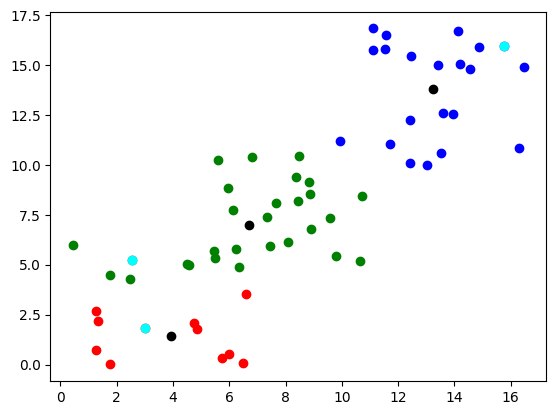

In [19]:
def calculate_new_centroids(points: np.ndarray, assigned_centroids: np.ndarray, k_clusters: int) -> np.ndarray:
  """
  Computes new centroids based on the current cluster assignments.

  Parameters:
  :param points: Array of n data points.
  :type points: ndarray with shape (n, 2)

  :param assigned_centroids: Array indicating the closest centroid for each data point.
  :type assigned_centroids: ndarray with shape (1, n) and dtype = np.int32


  :param k_clusters: Number of clusters.
  :type k_clusters: int


  :return: new_clusters
  new_clusters: new cluster points

  :rtype:
  new_clusters: ndarray with shape (1, n) and dtype = np.float32
  """

  ###################################
  # Write your own code here #

  #Ensure it's 1D
  assigned_centroids = assigned_centroids.flatten()
  # Initialize new centroids
  new_clusters = np.zeros((k_clusters, 2), dtype=np.float32)

  for k in range(k_clusters):
      # Get all points assigned to cluster k
      cluster_points = points[assigned_centroids == k]

      if len(cluster_points) > 0:
          # Compute mean position for the new centroid
          new_clusters[k] = np.mean(cluster_points, axis=0)

  ###################################

  return new_clusters

new_clusters = calculate_new_centroids(loaded_points, assigned_centroids,k)
print(new_clusters)
print(initial_clusters)

assigned_centroids = assigned_centroids.flatten()[:, np.newaxis]  # Shape (60, 1)
combined_array = np.column_stack((loaded_points, assigned_centroids))
filtered_points0 = combined_array[combined_array[:, 2] == 0]
filtered_points1 = combined_array[combined_array[:, 2] == 1]
filtered_points2 = combined_array[combined_array[:, 2] == 2]

plt.figure()
plt.scatter(filtered_points0[:,0],filtered_points0[:,1], color="red")
plt.scatter(filtered_points1[:,0],filtered_points1[:,1], color="blue")
plt.scatter(filtered_points2[:,0],filtered_points2[:,1], color="green")
plt.scatter(initial_clusters[:,0],initial_clusters[:,1], color="cyan")
plt.scatter(new_clusters[:,0],new_clusters[:,1], color="black")

903.1134628018915


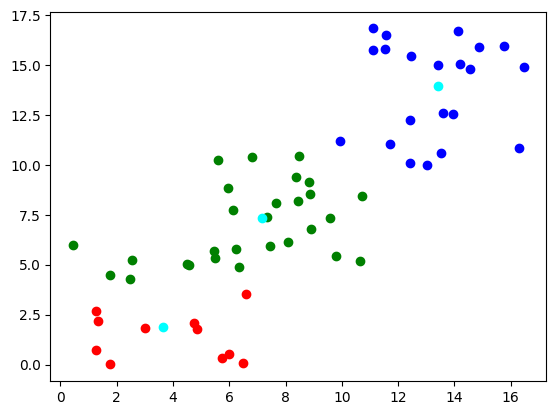

In [32]:
def fit(points: np.ndarray, k_clusters: int, n_of_oterations: int, error: float = 0.001) -> tuple:
  """
  Fits the k-means clustering model on the dataset.

  Parameters:
  :param points : Array of data points.
  :type points: ndarray with shape (n, 2) and dtype = np.float32

  :param k_clusters:  Number of clusters
  :type k_clusters: int

  :param n_of_oterations:  Maximum number of iterations
  :type n_of_oterations: int


  :param error: Threshold for convergence.
  :type error: float

  :return: centroid_points, last_objective
  centroid_points: final centroid points
  last_objective: final objective funtion

  :rtype:
  centroid_points: ndarray with shape (k_clusters, 2) and dtype = np.float32
  last_objective: float

  """

  ###################################
  # Write your own code here #

  # Step 1: Initialize centroids randomly from the dataset
  initial_clusters = initialize_clusters(loaded_points, k)
  #last_objective = 10000.0

  for _ in range(n_of_oterations):
      # Step 2: Compute distances and assign points to the nearest centroid
      distances = compute_distances(loaded_points,initial_clusters)
      assigned_centroids = assign_centroids(distances)

      # Step 3: Compute new centroids
      new_clusters = calculate_new_centroids(loaded_points, assigned_centroids,k)

      # Step 4: Compute the objective function (Sum of Squared Distances)
      last_objective = calculate_objective(assigned_centroids,distances)

      # Step 5: Check for convergence
      if  np.linalg.norm(new_clusters - initial_clusters) < error:
          break

      centroid_points = new_clusters  # Update centroids

  ###################################

  return centroid_points, last_objective

n_of_iterations = 10000
final_centroids, objective_value = fit(loaded_points, k, n_of_iterations)

print(objective_value)
plt.figure()
plt.scatter(filtered_points0[:,0],filtered_points0[:,1], color="red")
plt.scatter(filtered_points1[:,0],filtered_points1[:,1], color="blue")
plt.scatter(filtered_points2[:,0],filtered_points2[:,1], color="green")
plt.scatter(final_centroids[:,0],final_centroids[:,1], color="cyan")